<a href="https://colab.research.google.com/github/rahiakela/natural-language-processing-in-action/blob/5-baby-steps-with-neuralnetworks/perceptrons_and_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baby steps with neural networks (perceptrons and backpropagation)

## Neural networks

As the availability of processing power and memory has exploded over the course of the decade, an old technology has come into its own again. First proposed in the 1950s by Frank Rosenblatt, the perceptron1 offered a novel algorithm for finding patterns in data.

The basic concept lies in a rough mimicry of the operation of a living neuron cell.
As electrical signals flow into the cell through the dendrites (see figure) into the
nucleus, an electric charge begins to build up. When the cell reaches a certain level of
charge, it fires, sending an electrical
signal out through the axon.


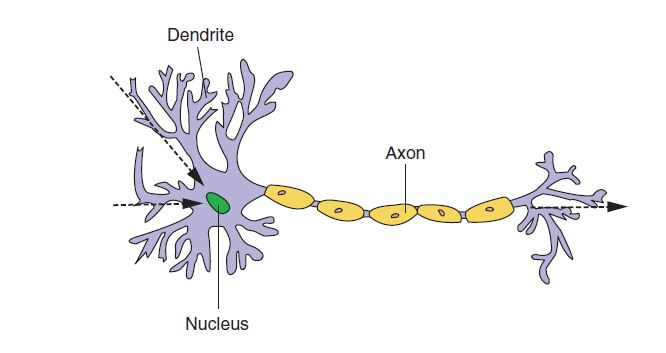

In [0]:
from IPython.display import Image
Image('perceptron-1.JPG')

The key concept to notice
here is the way the cell weights
incoming signals when deciding when to fire. The neuron will dynamically change
those weights in the decision making process over the course of its life.

## Perceptron

Rosenblatt’s original project was to teach a machine to recognize images. The original
perceptron was a conglomeration of photo-receptors and potentiometers, not a computer
in the current sense. But implementation specifics aside, Rosenblatt’s concept
was to take the features of an image and assign a weight, a measure of importance, to
each one. The features of the input image were each a small subsection of the image.

A grid of photo-receptors would be exposed to the image. Each receptor would see
one small piece of the image. The brightness of the image that a particular photoreceptor
could see would determine the strength of the signal that it would send to
the associated “dendrite.”

Each dendrite had an associated weight in the form of a potentiometer. Once
enough signal came in, it would pass the signal into the main body of the “nucleus” of
the “cell.” Once enough of those signals from all the potentiometers passed a certain
threshold, the perceptron would fire down its axon, indicating a positive match on the
image it was presented with. If it didn’t fire for a given image, that was a negative classification
match. Think “hot dog, not hot dog” or “iris setosa, not iris setosa.”

## A numerical perceptron

### Motivation

Basically, you’d like to take an example from a dataset, show it to an algorithm, and
have the algorithm say yes or no. That’s all you’re doing so far. The first piece you
need is a way to determine the features of the sample. Choosing appropriate features
turns out to be a surprisingly challenging part of machine learning.

 In “normal”
machine learning problems, like predicting home prices, your features might be
square footage, last sold price, and ZIP code. 

Or perhaps you’d like to predict the species
of a certain flower using the Iris dataset.2 In that case your features would be petal
length, petal width, sepal length, and sepal width.

In Rosenblatt’s experiment, the features were the intensity values of each pixel
(subsections of the image), one pixel per photo receptor. You then need a set of
weights to assign to each of the features. 

Don’t worry yet about where these weights
come from. Just think of them as a percentage of the signal to let through into the
neuron. If you’re familiar with linear regression, then you probably already know
where these weights come from.

Generally, you’ll see the individual features denoted as xi, where i is a
reference integer. And the collection of all features for a given example are
denoted as X representing a vector:

$$X = [x1, x2, …, xi, …, xn]$$

And similarly, you’ll see the associate weights for each feature as wi, where i
corresponds to the index of feature x associated with that weight. And the
weights are generally represented as a vector W:

$$W = [w1, w2, …, wi, …, wn]$$

With the features in hand, you just multiply each feature (xi) by the corresponding
weight (wi) and then sum up:

$$ (x1 * w1) + (x2 * w2) + … + (xi * wi) + … $$

The one piece you’re missing here is the neuron’s threshold to fire or not. And it’s
just that, a threshold. Once the weighted sum is above a certain threshold, the perceptron
outputs 1. Otherwise it outputs 0.

You can represent this threshold with a simple step function (labeled “Activation
Function” in figure).

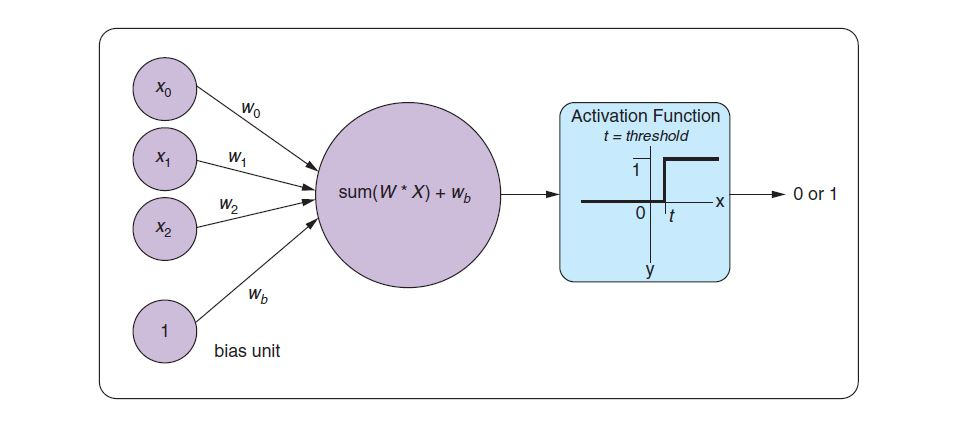

In [0]:
from IPython.display import Image
Image('perceptron-2.JPG')

### Detour through bias

The bias is an “always on”
input to the neuron. The neuron has a weight dedicated to it just as with every other
element of the input, and that weight is trained along with the others in the exact
same way. This is represented in two ways in the various literature around neural networks.
You may see the input represented as the base input vector, say of n-elements,with a 1 appended to the beginning or the end of the vector, giving you an n+1 dimensional
vector. The position of the 1 is irrelevant to the network, as long as it’s consistent
across all of your samples.

The reason for having the bias weight at all is that you need the neuron to be resilient
to inputs of all zeros. It may be the case that the network needs to learn to output
0 in the face of inputs of 0, but it may not. Without the bias term, the neuron would
output 0 * weight = 0 for any weights you started with or tried to learn. With the bias
term, you won’t have this problem.

Figure is a rather neat visualization of the analogy between some of the signals
within a biological neuron in your brain and the signals of an artificial neuron used for
deep learning.

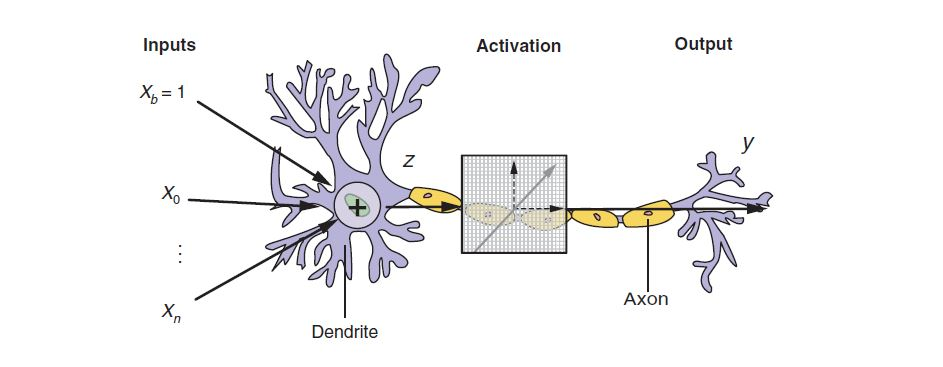

In [0]:
from IPython.display import Image
Image('perceptron-3.JPG')

And in mathematical terms, the output of your perceptron, denoted f(x), looks like:

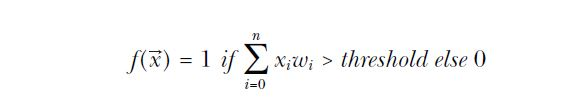

In [0]:
from IPython.display import Image
Image('perceptron-4.JPG')

Your perceptron hasn’t learned anything just yet. But you have achieved something
quite important. You’ve passed data into a model and received an output. That output
is likely wrong, given you said nothing about where the weight values come from. But
this is where things will get interesting.

### A PYTHONIC NEURON

Calculating the output of the neuron described earlier is straightforward in Python.
You can also use the numpy dot function to multiply your two vectors together:

In [0]:
import numpy as np

# row data
example_input = [1, .2, .1, .05, .2]
example_weights = [.2, .12, .4, .6, .90]

# convert into numpy array
input_vector = np.array(example_input)
weights = np.array(example_weights)

# bias term
bias_weight = .2

# The multiplication by one (* 1) is just to emphasize that the bias_weight is like all the other weights:
# it’s multiplied by an input value, only the bias_weight input feature value is always 1.
activation_level = np.dot(input_vector, weights) + (bias_weight * 1)
activation_level

0.6740000000000002

With that, if you use a simple threshold activation function and choose a threshold of
.5, your next step is the following:

In [0]:
threshold = .5
 
if activation_level >= threshold:
   perceptron_output = 1
else:
   perceptron_output = 0

# see the result
perceptron_output

1

Given the example_input, and that particular set of weights, this perceptron will output 1 But if you have several example_input vectors and the associated expected outcomes with each (a labeled dataset), you can decide if the perceptron is correct or
not for each guess.

### CLASS IS IN SESSION